✅ Dataset loaded successfully!
Shape: (9994, 21)

First 5 rows:
    Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region      

/tmp/ipython-input-3382359940.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)  # Numeric → mean
/tmp/ipython-input-3382359940.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

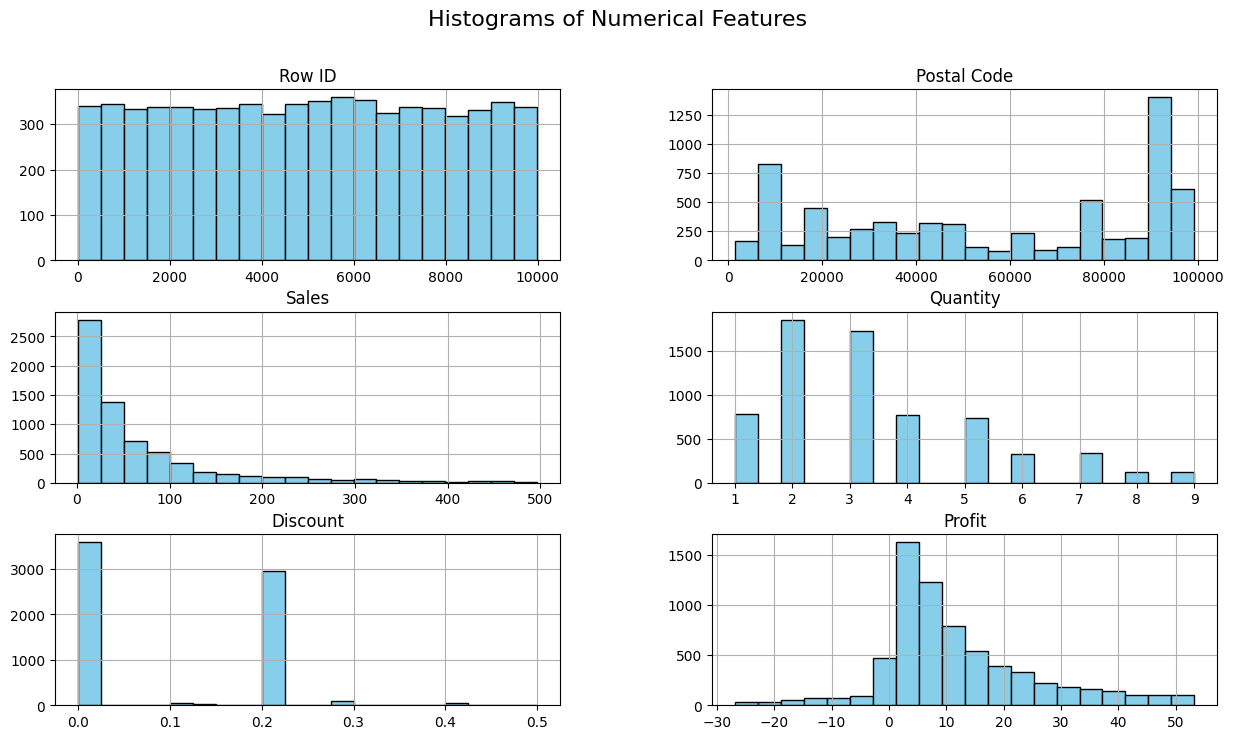

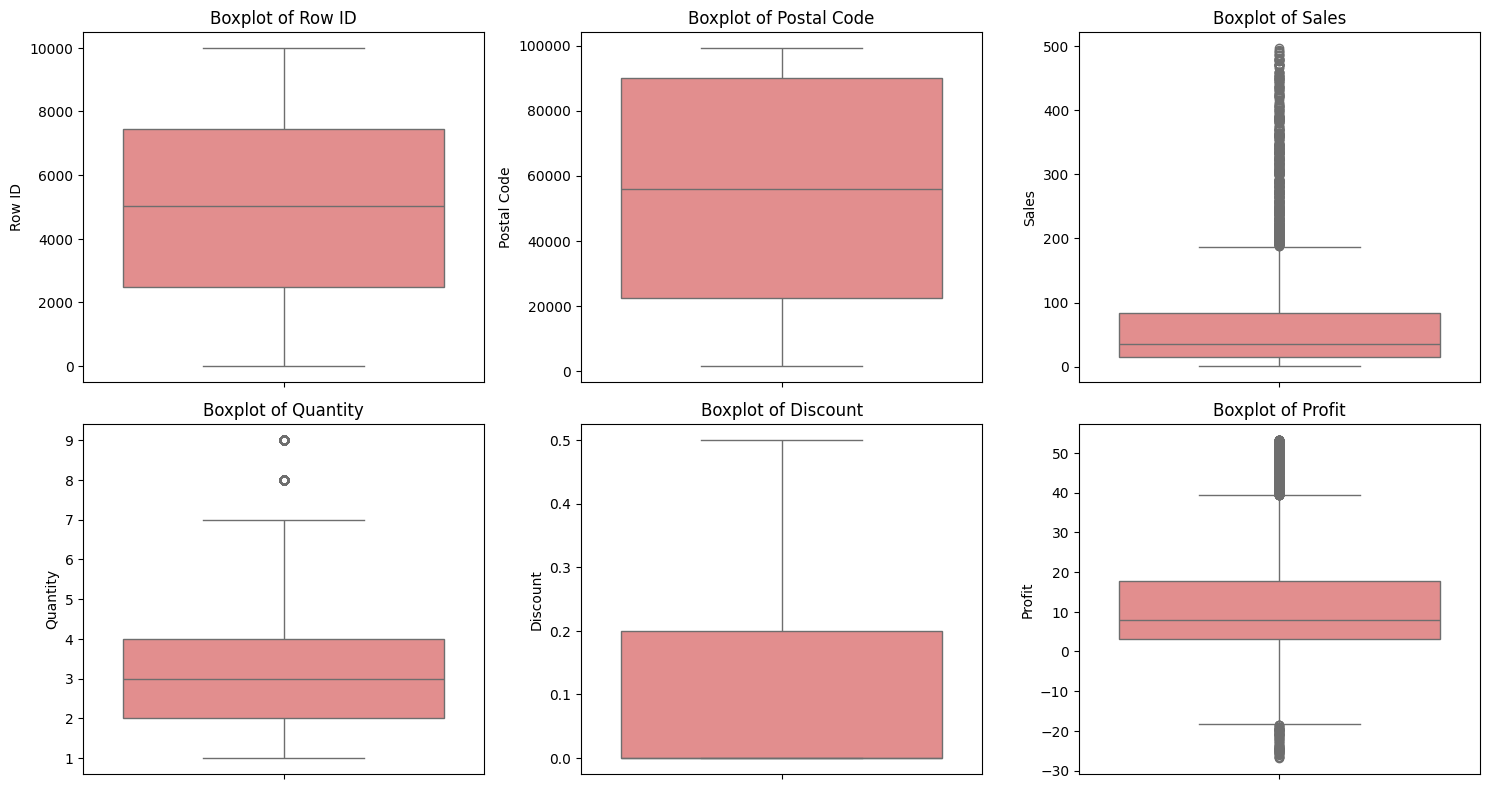

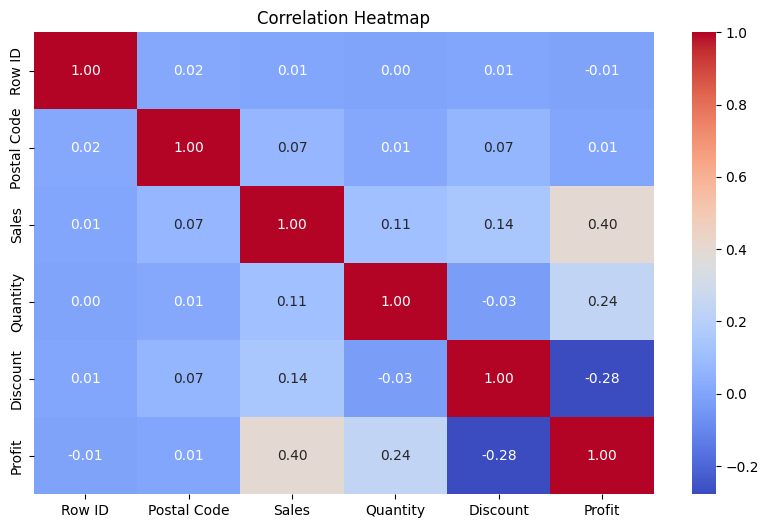


💾 Cleaned dataset saved to: eda_outputs/Sample_Superstore_Cleaned.csv

🎯 EDA Completed Successfully!


In [2]:
# ================================
# Exploratory Data Analysis (EDA) - Sample Superstore
# ================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# ================================
# 1. Load Dataset
# ================================
file_path = "/content/Sample - Superstore.csv.zip"  # Change path if needed
df = pd.read_csv(file_path, encoding='latin1')

print("✅ Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print("\nFirst 5 rows:\n", df.head())

# ================================
# 2. Data Cleaning
# ================================

# Check missing values
print("\nMissing values before cleaning:\n", df.isnull().sum())

# Fill missing values
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        df[col].fillna(df[col].mean(), inplace=True)  # Numeric → mean
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)  # Categorical → mode

# Remove duplicates
df.drop_duplicates(inplace=True)

# Detect & remove outliers using IQR method
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print("\n✅ Data cleaned successfully!")
print(f"Shape after cleaning: {df.shape}")

# ================================
# 3. Statistical Analysis
# ================================
print("\n📊 Statistical Summary:\n", df.describe())
print("\n📈 Variance:\n", df.var(numeric_only=True))
print("\n🔗 Correlation Matrix:\n", df.corr(numeric_only=True))

# ================================
# 4. Data Visualization
# ================================

# Create folder for outputs
output_dir = "eda_outputs"
os.makedirs(output_dir, exist_ok=True)

# Histograms
df.hist(bins=20, figsize=(15, 8), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.savefig(os.path.join(output_dir, "histograms.png"))
plt.show()

# Boxplots
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, (len(numeric_cols) + 1) // 2, i)
    sns.boxplot(y=df[col], color='lightcoral')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "boxplots.png"))
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.savefig(os.path.join(output_dir, "heatmap.png"))
plt.show()

# ================================
# 5. Save cleaned dataset
# ================================
cleaned_path = os.path.join(output_dir, "Sample_Superstore_Cleaned.csv")
df.to_csv(cleaned_path, index=False)
print(f"\n💾 Cleaned dataset saved to: {cleaned_path}")

print("\n🎯 EDA Completed Successfully!")
